Dataset Shape: (205, 26)

First 5 rows:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compres

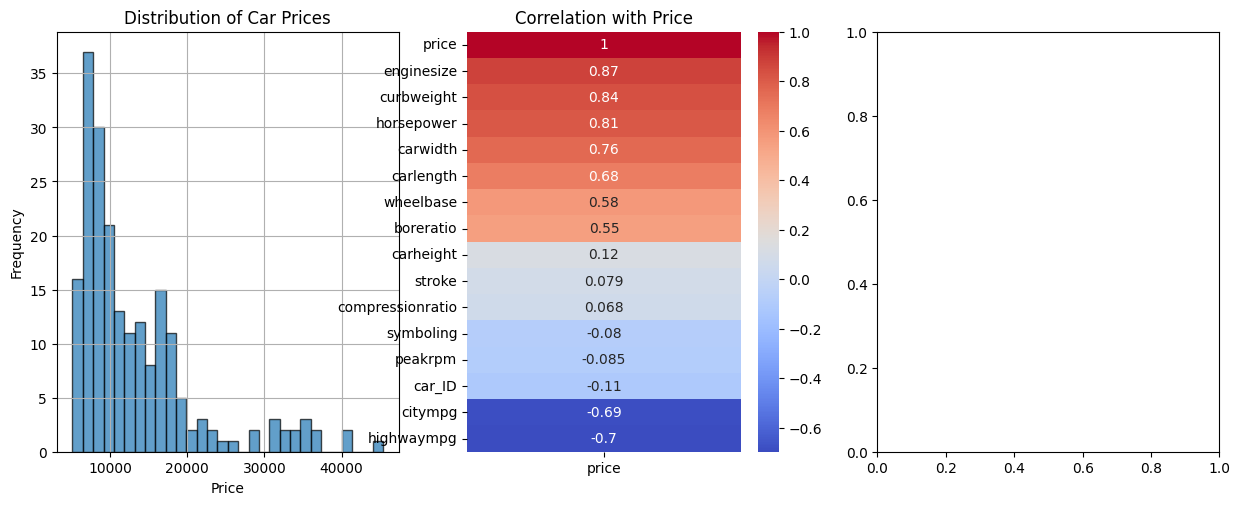

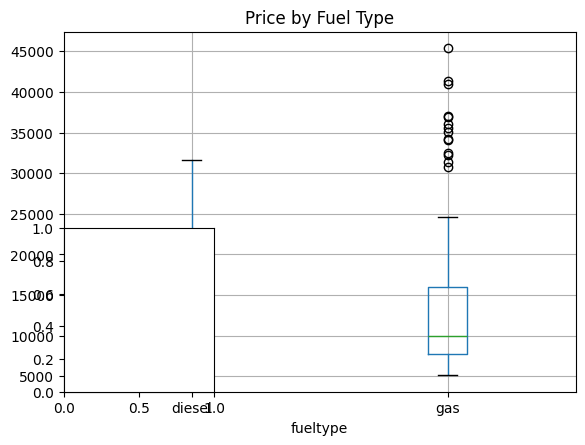

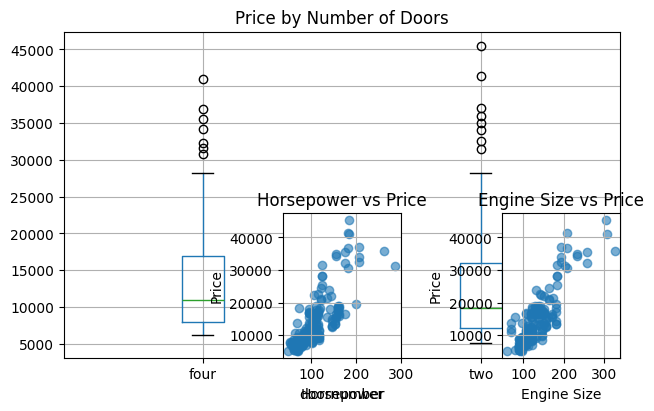

Selected features: ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'brand']
Number of features: 24

Training set size: (164, 24)
Testing set size: (41, 24)

Linear Regression Model

Training Results:
MAE: 2016.68
MSE: 7000378.66
RMSE: 2645.82
R2_Score: 0.8931

Testing Results:
MAE: 1570.75
MSE: 5440078.77
RMSE: 2332.40
R2_Score: 0.8991

 10 Important Features:
           feature   importance
14      enginesize  4281.619834
23           brand  1388.247060
9         carwidth  1328.527121
11      curbweight  1251.901841
6   enginelocation  1166.336469
22      highwaympg   992.897585
17          stroke   976.370015
20         peakrpm   916.146852
4          carbody   815.050306
10       carheight   773.341155


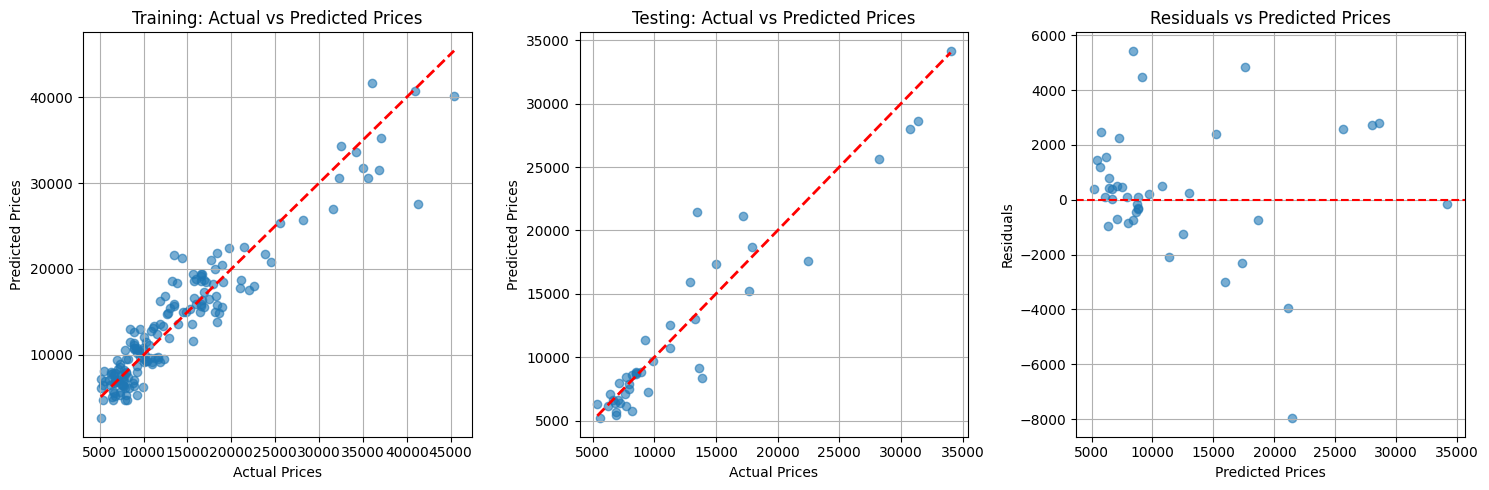


 Model Coefficients
           Feature  Coefficient
14      enginesize  4281.619834
23           brand -1388.247060
9         carwidth  1328.527121
11      curbweight  1251.901841
6   enginelocation  1166.336469
22      highwaympg   992.897585
17          stroke  -976.370015
20         peakrpm   916.146852
4          carbody  -815.050306
10       carheight   773.341155


In [10]:
#TASK 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
df = pd.read_csv('CarPrice_Assignment.csv')
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 1)
plt.hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.subplot(2, 3, 2)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Price')
plt.subplot(2, 3, 3)
df.boxplot(column='price', by='fueltype')
plt.title('Price by Fuel Type')
plt.suptitle('')
plt.subplot(2, 3, 4)
df.boxplot(column='price', by='doornumber')
plt.title('Price by Number of Doors')
plt.suptitle('')
plt.subplot(2, 3, 5)
plt.scatter(df['horsepower'], df['price'], alpha=0.6)
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Horsepower vs Price')
plt.grid(True)
plt.subplot(2, 3, 6)
plt.scatter(df['enginesize'], df['price'], alpha=0.6)
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size vs Price')
plt.grid(True)
plt.tight_layout()
plt.show()
df_processed = df.copy()
df_processed['brand'] = df_processed['CarName'].str.split().str[0]
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le
feature_cols = [col for col in df_processed.columns if col not in ['car_ID', 'CarName', 'price']]
print(f"Selected features: {feature_cols}")
print(f"Number of features: {len(feature_cols)}")
X = df_processed[feature_cols]
y = df_processed['price']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=55)
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)
print(f"\nTraining set size: {train_X_scaled.shape}")
print(f"Testing set size: {test_X_scaled.shape}")
print("\nLinear Regression Model")
lr_ml_model = LinearRegression()
lr_ml_model.fit(train_X_scaled, train_y)
train_pred_y = lr_ml_model.predict(train_X_scaled)
test_pred_y = lr_ml_model.predict(test_X_scaled)
def evaluate_ml_model(y_true, pred_y, dataset_name):
    mae = mean_absolute_error(y_true, pred_y)
    mse = mean_squared_error(y_true, pred_y)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, pred_y)
    print(f"\n{dataset_name} Results:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2_Score: {r2:.4f}")
    return mae, mse, rmse, r2
train_metrics = evaluate_ml_model(train_y, train_pred_y, "Training")
test_metrics = evaluate_ml_model(test_y, test_pred_y, "Testing")
feature_importance = pd.DataFrame({'feature': feature_cols, 'importance': abs(lr_ml_model.coef_)}).sort_values('importance', ascending=False)
print("\n 10 Important Features:")
print(feature_importance.head(10))
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(train_y, train_pred_y, alpha=0.6)
plt.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Training: Actual vs Predicted Prices')
plt.grid(True)
plt.subplot(1, 3, 2)
plt.scatter(test_y, test_pred_y, alpha=0.6)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Testing: Actual vs Predicted Prices')
plt.grid(True)
plt.subplot(1, 3, 3)
residuals = test_y - test_pred_y
plt.scatter(test_pred_y, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.grid(True)
plt.tight_layout()
plt.show()
print("\n Model Coefficients")
coefficients_df = pd.DataFrame({'Feature': feature_cols, 'Coefficient': lr_ml_model.coef_}).sort_values('Coefficient', key=abs, ascending=False)
print(coefficients_df.head(10))

Dataset Overview:
   Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4           3225.6  
1 

ValueError: num must be an integer with 1 <= num <= 3, not 4

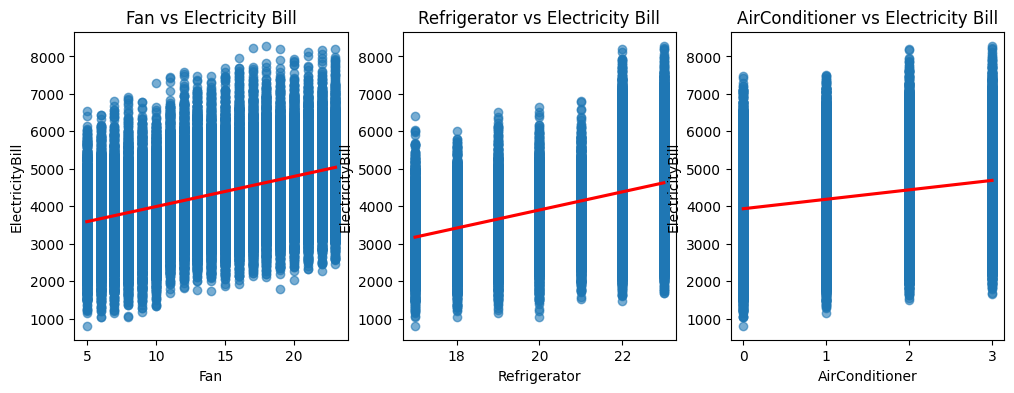

In [11]:
# TASK 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats
import numpy as np
df = pd.read_csv("electricity_bill_dataset.csv")
print("Dataset Overview:")
print(df.head())
print("\nMissing Values:", df.isnull().sum().sum())
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_df.columns[:-1], 1):
    plt.subplot(1, 3, i)
    sns.regplot(x=numeric_df[col], y=numeric_df['ElectricityBill'], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f'{col} vs Electricity Bill')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 8))
corr_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", center=0, square=True)
plt.title('Feature Correlation Matrix')
plt.show()
X = numeric_df.drop('ElectricityBill', axis=1)
y = numeric_df['ElectricityBill']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"\nModel Performance:")
print(f"R2_Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
residuals = y_test - y_pred
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(y_pred, residuals, alpha=0.6, color='blue')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Predicted\n(Homoscedasticity Check)')
axes[0].grid(True, alpha=0.3)
axes[1].hist(residuals, bins=15, edgecolor='black', alpha=0.7, color='green', density=True)
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Density')
axes[1].set_title('Residual Distribution\n(Normality Check)')
axes[1].grid(True, alpha=0.3)
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot\n(Normality Check)')
plt.tight_layout()
plt.show()

In [ ]:
#TASK 3
# Linear Regression
# Linear regression assumes that there is a straight-line (linear) relationship between the input features and the output.
# It also assumes that the errors are spread out evenly (same variance), are normally distributed, and that all data points are independent of each other.
# The features should also not be too closely related to each other.

# Decision Tree Classifier
# Decision trees don’t assume any special pattern or data type.
# They just assume that the data can be split into groups based on feature values.
# They can handle both numbers and categories easily.

# K-Nearest Neighbors (KNN)
# KNN assumes that similar things are close to each other.
# It means that data points that are near each other probably belong to the same class.
# It also assumes that all features are equally important, so the data should be scaled or normalized.

# Support Vector Machine (SVM)
# SVM assumes that data can be separated by a line (or hyperplane), means it is linearly separable.
# It also assumes that the data is scaled properly, because large feature values can affect how the line is drawn.
# It works best when classes are clearly separated.

# Random Forest Classifier
# Random Forest doesn’t make many assumptions.
# It just assumes that using many decision trees together will give better and more accurate results than using one tree alone.